# Optical Properties of Solids

Some different models to describe the absorption of light in solids due to free carrier absorption, dielectric resonances, and interband transitions.

import necessary packagaes

In [1]:
%config InlineBackend.figure_format = 'retina' #to make inline images higher res

from math import pi
#from scipy.integrate import trapz
#from scipy.interpolate import interp1d
#import scipy.io

import numpy as np
import matplotlib.pyplot as plt

define plot style

In [2]:
plt.style.use(['presplot'])

constants

In [3]:
c=2.998e8
hbar=1e-34
me=9.1e-31
eps_0=8.85e-12
e=1.6e-19 #C

### Drude Model

For metals, free carrier absorption is dominant over the entire frequency range. For semiconductors, the contribution due to free carriers is only relevant at low frequencies (above optical phonon, below bandgap).

Calculate Drude model optical constants (these parameters assume we have a metal)

In [4]:
#parameters
n=1e23*1e6 #1/m^3
tau=1e-14 #s, from A&M pg 9
eps_core=4

#calculate dielectric constant
ev=np.logspace(-3,1.5,500)
omega=ev*e/hbar
sigma0=n*e**2*tau/me
sigma=sigma0/(1-1j*omega*tau)
eps=(eps_core+1j*sigma/(eps_0*omega))

#calculate n and k
nc=eps**(0.5)

#calculate alpha
alpha=2*omega*np.imag(nc)/c*1/100

#calculate plasma frequency
omega_p=(n*e**2/(me*eps_core*eps_0))**0.5
ev_p=omega_p*hbar/e

#reflectivity
r=abs((1-nc)/(1+nc))**2

plot optical constants

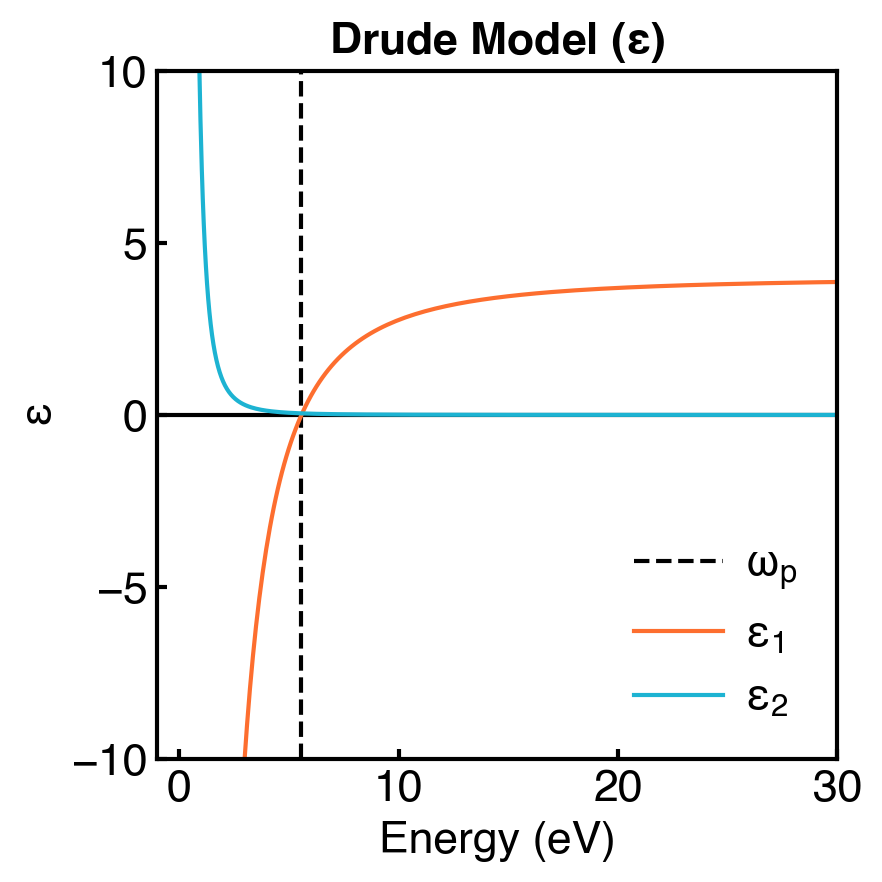

In [5]:
fig,ax=plt.subplots()
ax.axhline(y=0,color="black")
ax.axvline(x=ev_p,color="black",linestyle='--',label='$\omega_p$')
ax.plot(ev,np.real(eps),label='$\epsilon_1$')
ax.plot(ev,np.imag(eps),label='$\epsilon_2$')
ax.set_xlim([-1,30])
ax.set_ylim([-10,10])
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('$\epsilon$')
ax.set_title('Drude Model ($\epsilon$)')
ax.legend();

Note that $\epsilon_1$ is zero at the plasma frequency.

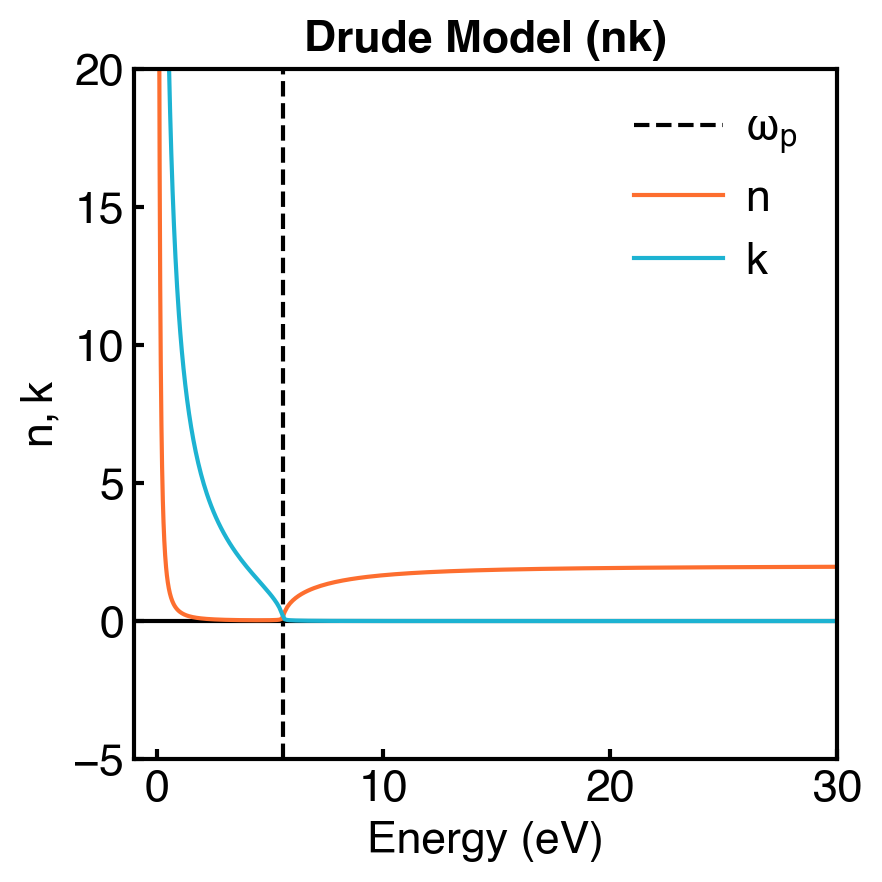

In [6]:
fig,ax=plt.subplots()
ax.axhline(y=0,color="black")
ax.axvline(x=ev_p,color="black",linestyle='--',label='$\omega_p$')
ax.plot(ev,np.real(nc),label='$n$')
ax.plot(ev,np.imag(nc),label='$k$')
ax.set_xlim([-1,30])
ax.set_ylim([-5,20])
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('$n, k$')
ax.set_title('Drude Model (nk)')
ax.legend();

Note that at low frequencies, n is about equal to k and both are large. At high frequencies, the index of refraction is almost entirely real and dominated by $\sqrt{\epsilon_{core}}$.

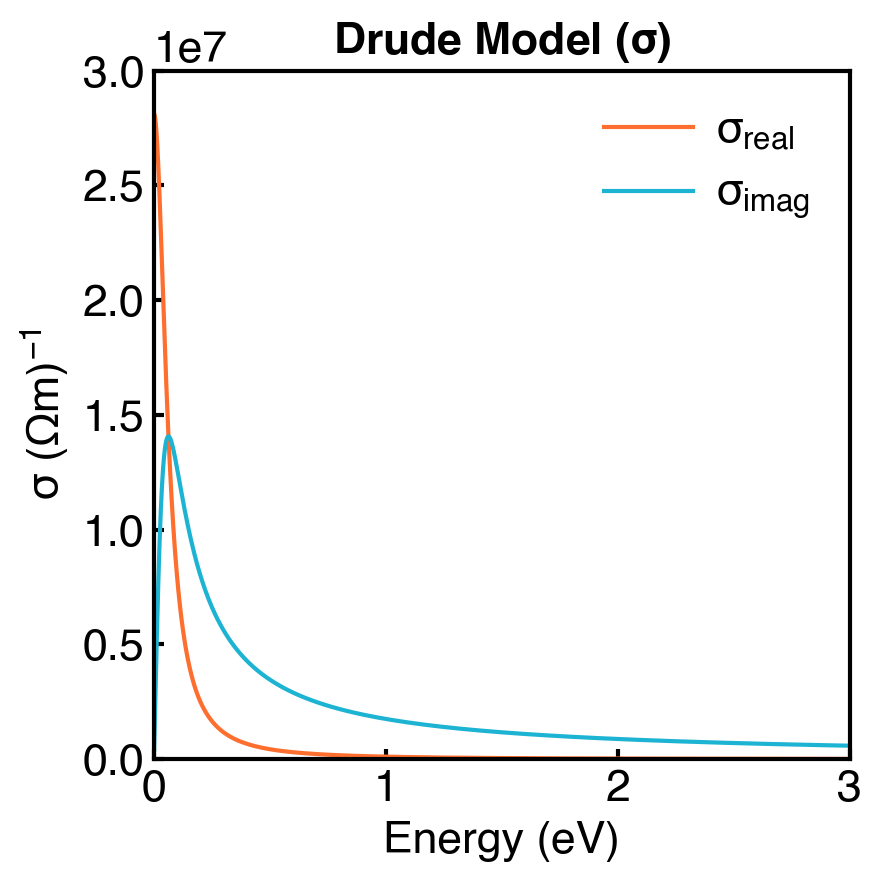

In [7]:
fig,ax=plt.subplots()
ax.plot(ev,np.real(sigma),label='$\sigma_{real}$')
ax.plot(ev,np.imag(sigma),label='$\sigma_{imag}$')
ax.set_xlim([0,3])
ax.set_ylim([0,3e7])
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('$\sigma$ $(\Omega m)^{-1}$')
ax.set_title('Drude Model ($\sigma$)')
ax.legend();

The conductivity at $\omega=0$ reduces to the DC Drude conductivity.

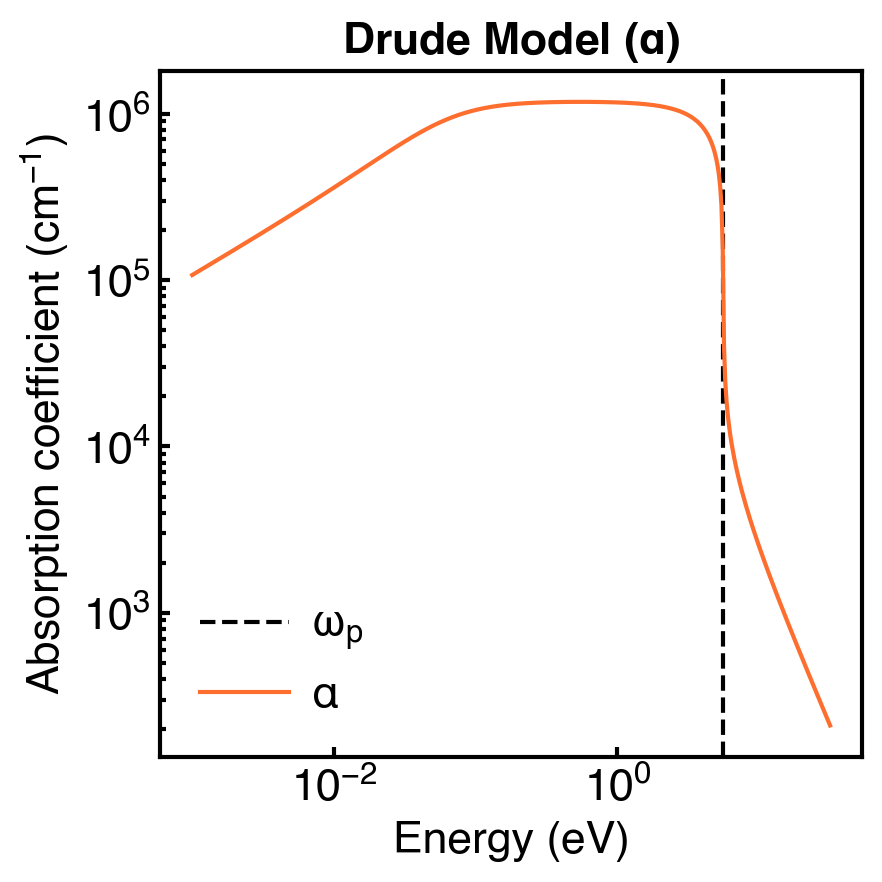

In [8]:
fig,ax=plt.subplots()
ax.axvline(x=ev_p,color="black",linestyle='--',label='$\omega_p$')
ax.plot(ev,alpha,label=r'$\alpha$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Absorption coefficient $(cm^{-1})$')
ax.set_title(r'Drude Model $(\alpha)$')
ax.legend()

Note that at low frequencies/energies, on a log log plot, absorption coefficient $\propto$ energy/2. This validates our $\sqrt{\omega}$ dependence of absorption coefficient.

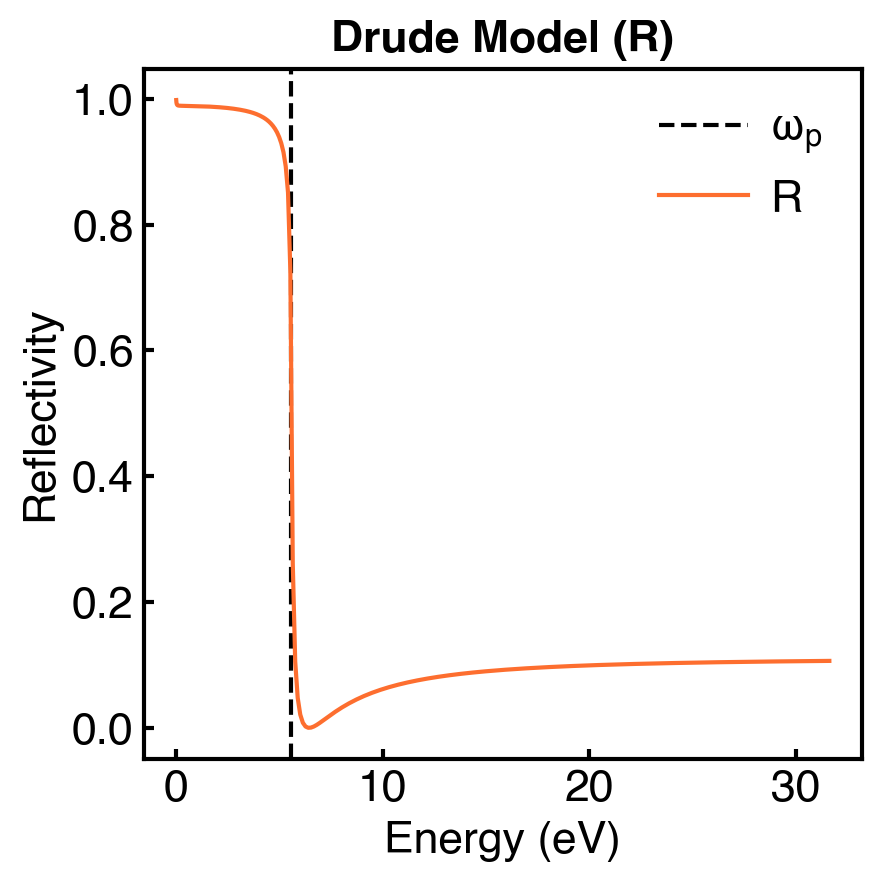

In [9]:
fig,ax=plt.subplots()
ax.axvline(x=ev_p,color="black",linestyle='--',label='$\omega_p$')
ax.plot(ev,r,label='R')
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Reflectivity')
ax.set_title(r'Drude Model (R)')
ax.legend()

Metals have reflectivity near 1 below their plasma frequency, and behave like dielectrics above that frequency. Note that even though metals have a large absorption coefficient, they can still be very reflective instead of absorptive because of the dependence of R on the complex refractive index.

### Lorentzian Oscillator Model

For dielectrics, there can be various resonances due to the polarizability of the solid. Some of these could come from vibrations of the lattice (e.g. optical phonons), or excitons. These can be described by a Lorentzian oscillator model (similar to a simple mass on a spring). 

In a gas, molecular rotation at GHz - THz frequencies can also be described this way.

In [74]:
#set parameters (use an arbitrary omega_0 and omega_p and gamma)
ev_p=0.1
omega_p=ev_p*e/hbar
ev_0=0.1
omega_0=ev_0*e/hbar
gamma=3e13
#A=1e4

#calculate dielectric constant
ev=np.logspace(-4,1,500)
omega=ev*e/hbar
eps=0.5+omega_p**2/(omega_0**2-omega**2-1j*gamma*omega)

#calculate conductivity
sigma=1j*omega*eps*eps_0

#calculate n and k
nc=eps**(0.5)

#calculate alpha
alpha=2*omega*np.imag(nc)/c*1/100

#reflectivity
r=abs((1-nc)/(1+nc))**2

#what n does this correspond to?
m=0.01*me
eps_core=1
n=omega_p**2*eps_0*m*eps_core/(e**2)

plot optical constants

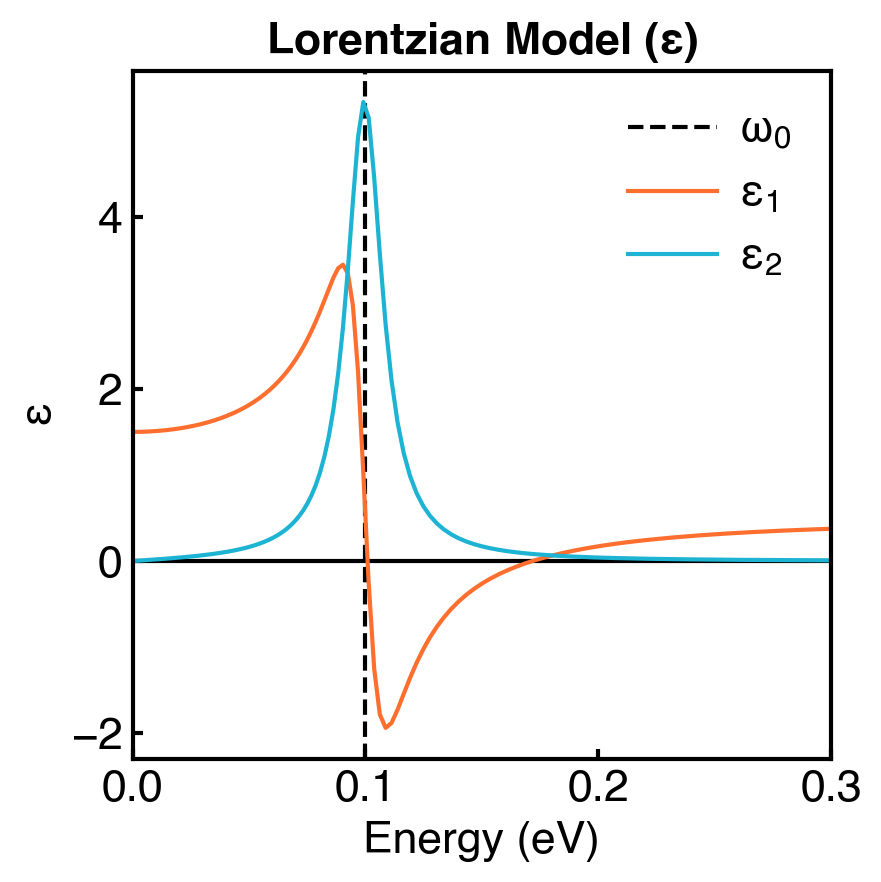

In [75]:
fig,ax=plt.subplots()
ax.axhline(y=0,color="black")
ax.axvline(x=ev_0,color="black",linestyle='--',label='$\omega_0$')
ax.plot(ev,np.real(eps),label='$\epsilon_1$')
ax.plot(ev,np.imag(eps),label='$\epsilon_2$')
ax.set_xlim([0,0.3])
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('$\epsilon$')
ax.set_title('Lorentzian Model ($\epsilon$)')
ax.legend();

Note that $\epsilon_1$ is zero at the plasma frequency.

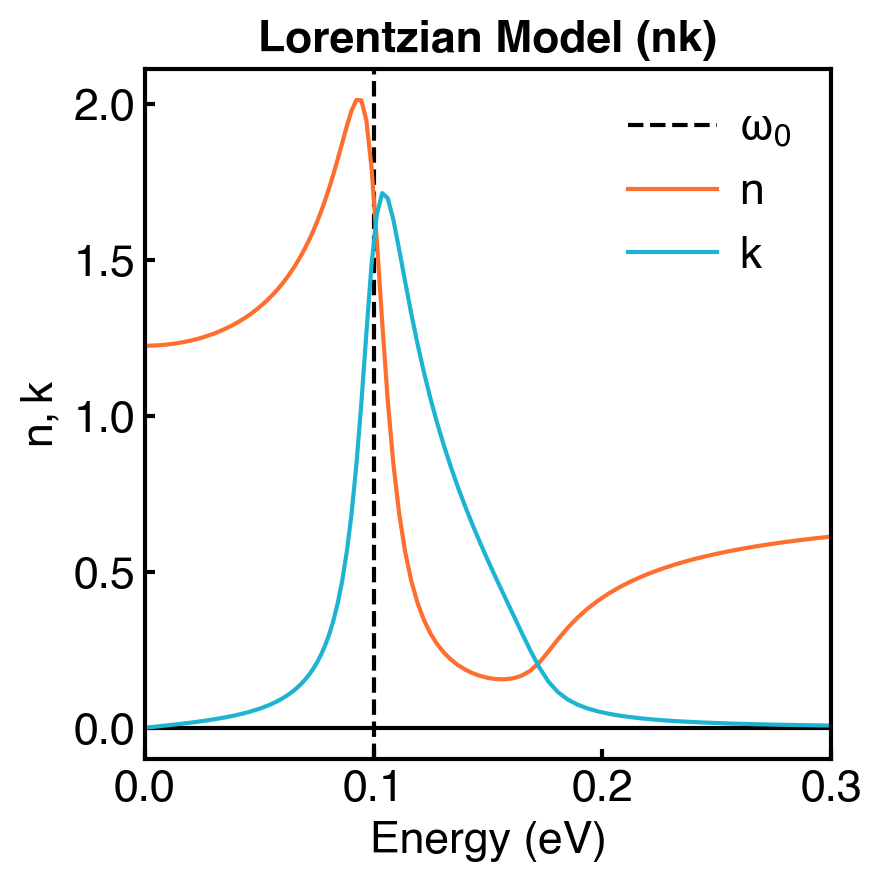

In [76]:
fig,ax=plt.subplots()
ax.axhline(y=0,color="black")
ax.axvline(x=ev_0,color="black",linestyle='--',label='$\omega_0$')
ax.plot(ev,np.real(nc),label='$n$')
ax.plot(ev,np.imag(nc),label='$k$')
ax.set_xlim([0,0.3])
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('$n, k$')
ax.set_title('Lorentzian Model (nk)')
ax.legend();

Note that at low frequencies, n is about equal to k and both are large. At high frequencies, the index of refraction is almost entirely real and dominated by $\sqrt{\epsilon_{core}}$.

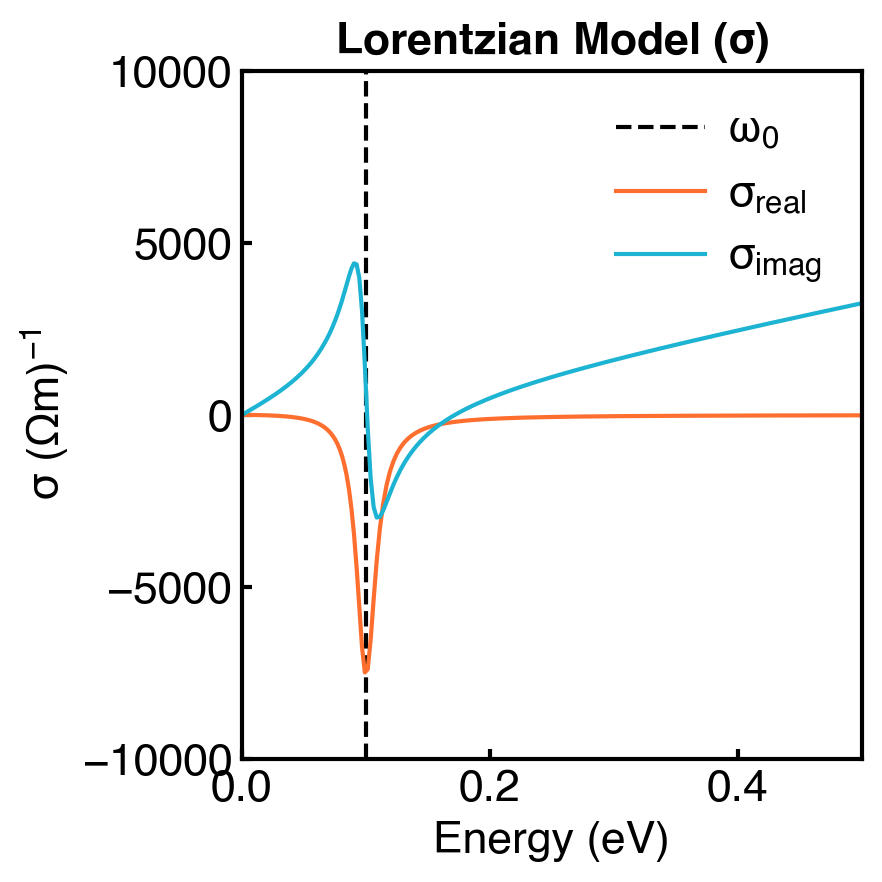

In [77]:
fig,ax=plt.subplots()
ax.axvline(x=ev_0,color="black",linestyle='--',label='$\omega_0$')
ax.plot(ev,np.real(sigma),label='$\sigma_{real}$')
ax.plot(ev,np.imag(sigma),label='$\sigma_{imag}$')
ax.set_xlim([0,0.5])
ax.set_ylim([-1e4,1e4])
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('$\sigma$ $(\Omega m)^{-1}$')
ax.set_title('Lorentzian Model ($\sigma$)')
ax.legend();

The conductivity at $\omega=0$ reduces to the DC Drude conductivity.

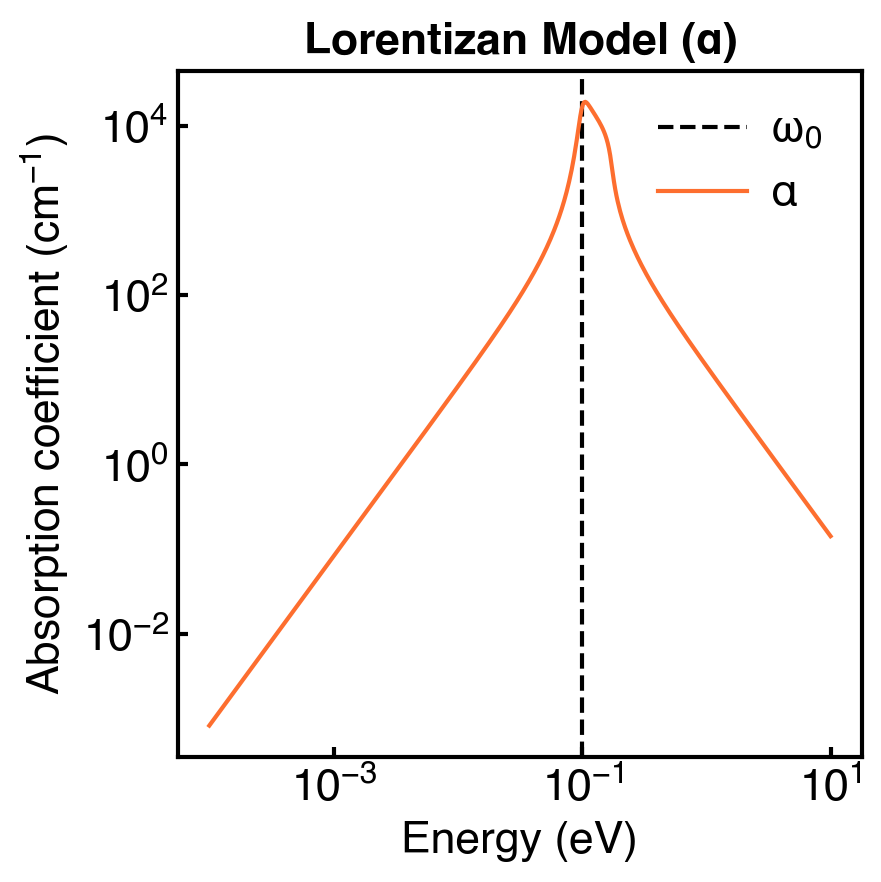

In [78]:
fig,ax=plt.subplots()
ax.axvline(x=ev_0,color="black",linestyle='--',label='$\omega_0$')
ax.plot(ev,alpha,label=r'$\alpha$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Absorption coefficient $(cm^{-1})$')
ax.set_title(r'Lorentizan Model $(\alpha)$')
ax.legend()

Note that at low frequencies/energies, on a log log plot, absorption coefficient $\propto$ energy/2. This validates our $\sqrt{\omega}$ dependence of absorption coefficient.

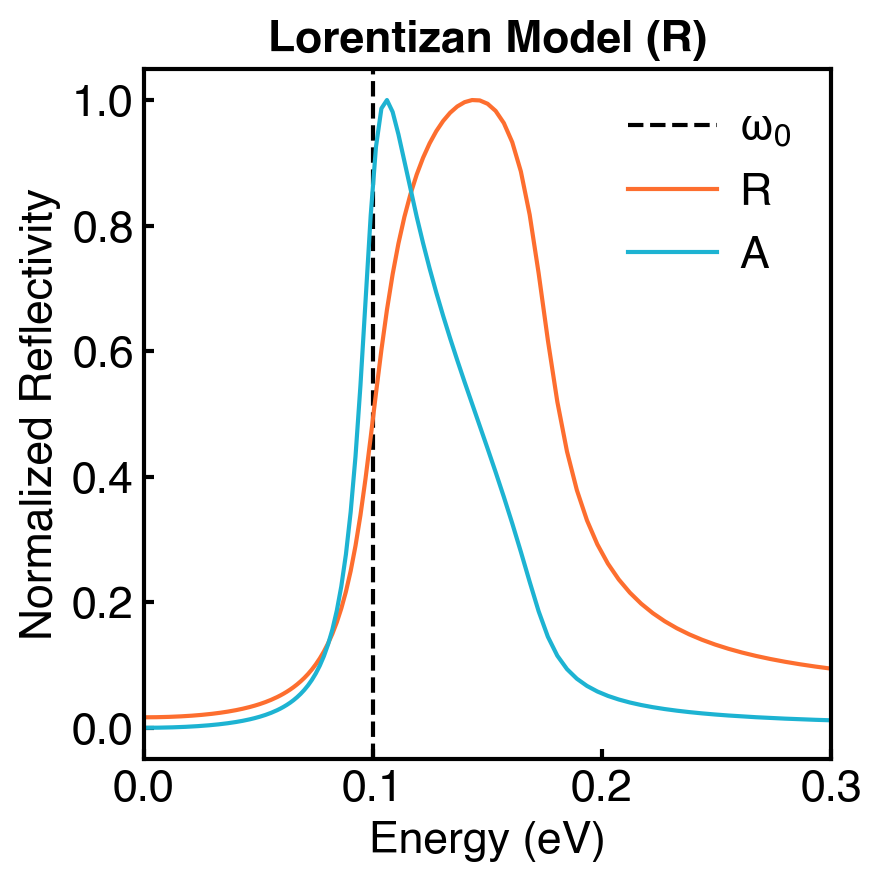

In [79]:
fig,ax=plt.subplots()
ax.axvline(x=ev_0,color="black",linestyle='--',label='$\omega_0$')
ax.plot(ev,r/max(r),label='R')
ax.plot(ev,alpha/max(alpha),label='A')
ax.set_xlim([0,0.3])
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Normalized Reflectivity')
ax.set_title(r'Lorentizan Model (R)')
ax.legend()

### Combining All Models

Let's have a semiconductor with free carrier absorption at low energies corresponding to a plasma frequency $\hbar\omega_p=0.05 eV$, an optical phonon resonance creating an Lorentz oscillator resonance at $\hbar \omega_0=0.1 eV$, and a direct bandgap at $2 eV$.

In [37]:
#set up range of omegas
ev=np.logspace(-2,1,500)
omega=ev*e/hbar

#Lorentzian parameters
ev_p=0.01
omega_p=ev_p*e/hbar
ev_0=0.1
omega_0=ev_0*e/hbar
gamma=3e13

#Drude parameters
tau=1e-14

#Direct bandgap 
eg=3 #eV
omega_g=eg*e/hbar
egs=omega-omega_g
egs[egs<0]=0

#calculate dielectric constant
eps=1+omega_p**2/(omega_0**2-omega**2-1j*gamma*omega)+1j*omega_p**2*tau/(omega*(1-1j*omega*tau))

#conductivity
sigma=1j*omega*eps*eps_0

#n and k
nc=eps**(0.5)

#alpha
alpha=2*omega*np.imag(nc)/c*1/100+1e14*(egs)**0.5/omega #adding on direct bandgap component
alpha_id=2*omega*np.imag(nc)/c*1/100+1e-10*(egs)**2/omega #adding on indirect bandgap component

#reflectivity
r=abs((1-nc)/(1+nc))**2

#what n does this correspond to?
m=0.01*me
eps_core=1
n=omega_p**2*eps_0*m*eps_core/(e**2)
n #this is in 1/m^3!!! makes sense, ~10^14 cm^-3

8.053499999999999e+20

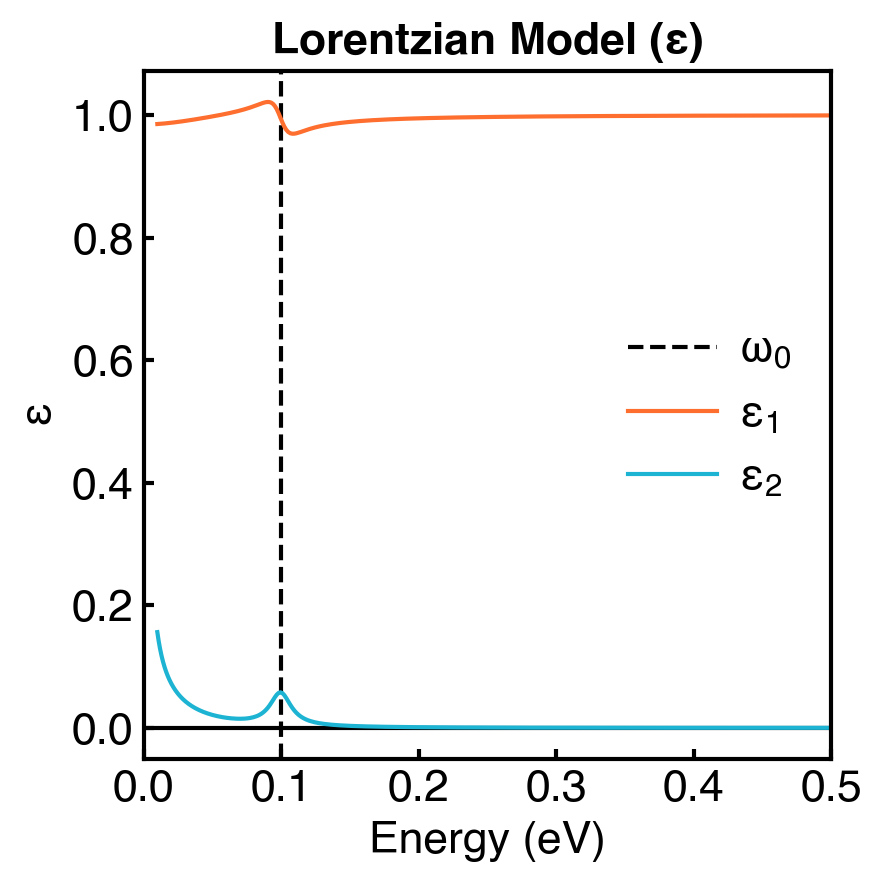

In [38]:
fig,ax=plt.subplots()
ax.axhline(y=0,color="black")
ax.axvline(x=ev_0,color="black",linestyle='--',label='$\omega_0$')
ax.plot(ev,np.real(eps),label='$\epsilon_1$')
ax.plot(ev,np.imag(eps),label='$\epsilon_2$')
ax.set_xlim([0,0.5])
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('$\epsilon$')
ax.set_title('Lorentzian Model ($\epsilon$)')
ax.legend();

Note that this only includes the free carrier & optical phonon contributions. We learned how to calculate the absorption coefficient from the direct bandgap, but not the dielectric constant. That comes next class!

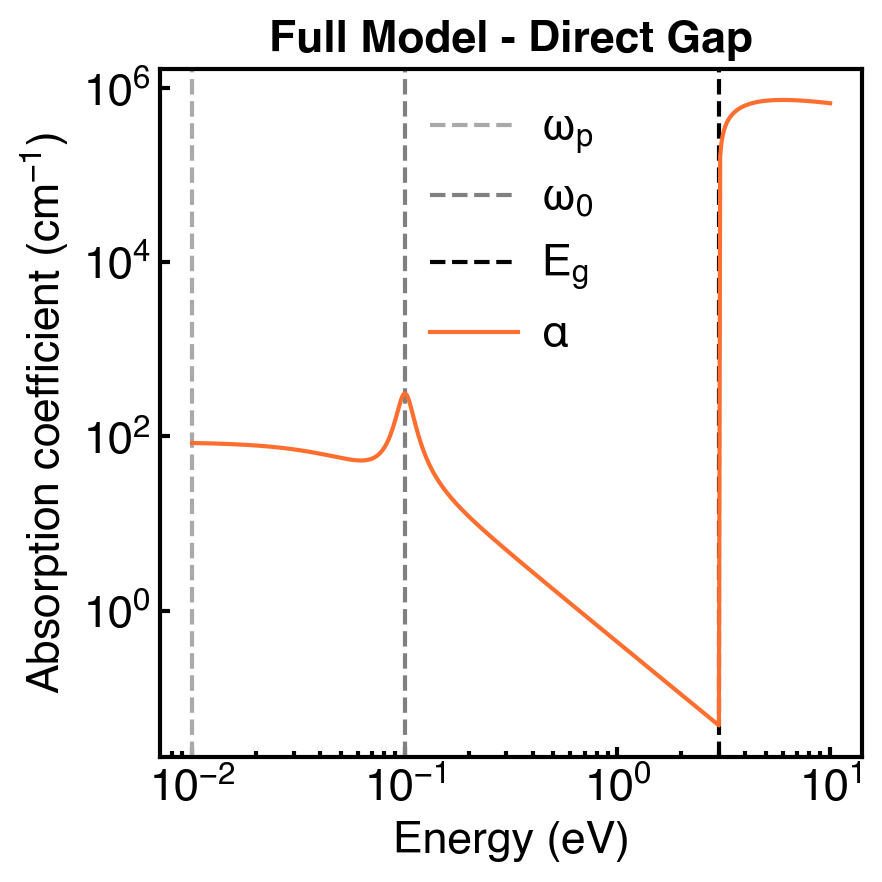

In [39]:
fig,ax=plt.subplots()
ax.axvline(x=ev_p,color="darkgrey",linestyle='--',label='$\omega_p$')
ax.axvline(x=ev_0,color="grey",linestyle='--',label='$\omega_0$')
ax.axvline(x=eg,color="black",linestyle='--',label='$E_g$')
ax.plot(ev,alpha,label=r'$\alpha$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Absorption coefficient $(cm^{-1})$')
ax.set_title(r'Full Model - Direct Gap')
ax.legend()

We see the optical phonon at $\omega_0$, the bandgap at $E_g$, and a region in the middle where the slope of the log-log plot is -2. This corresponds to our free carrier absorption dependence $1/\omega^2$.

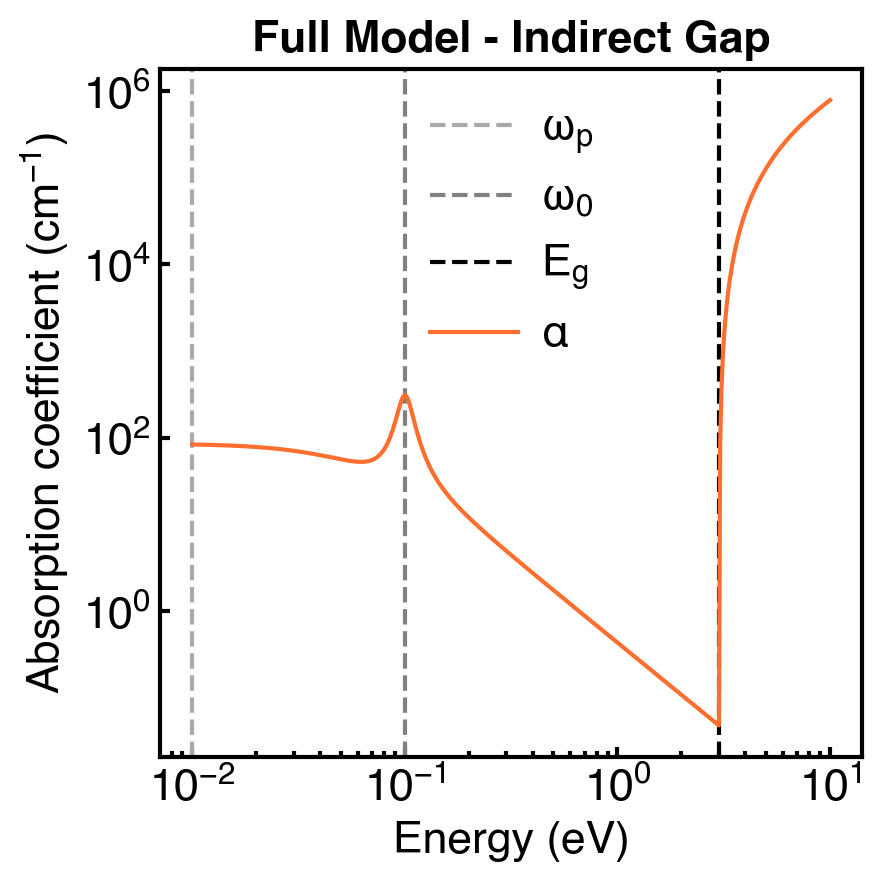

In [40]:
fig,ax=plt.subplots()
ax.axvline(x=ev_p,color="darkgrey",linestyle='--',label='$\omega_p$')
ax.axvline(x=ev_0,color="grey",linestyle='--',label='$\omega_0$')
ax.axvline(x=eg,color="black",linestyle='--',label='$E_g$')
ax.plot(ev,alpha_id,label=r'$\alpha$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Absorption coefficient $(cm^{-1})$')
ax.set_title(r'Full Model - Indirect Gap')
ax.legend()

We see the optical phonon at $\omega_0$, the bandgap at $E_g$, and a region in the middle where the slope of the log-log plot is -2. This corresponds to our free carrier absorption dependence $1/\omega^2$.

A more complex version of this, from Millie Dresselhaus' notes on Optical Properties of Solids:

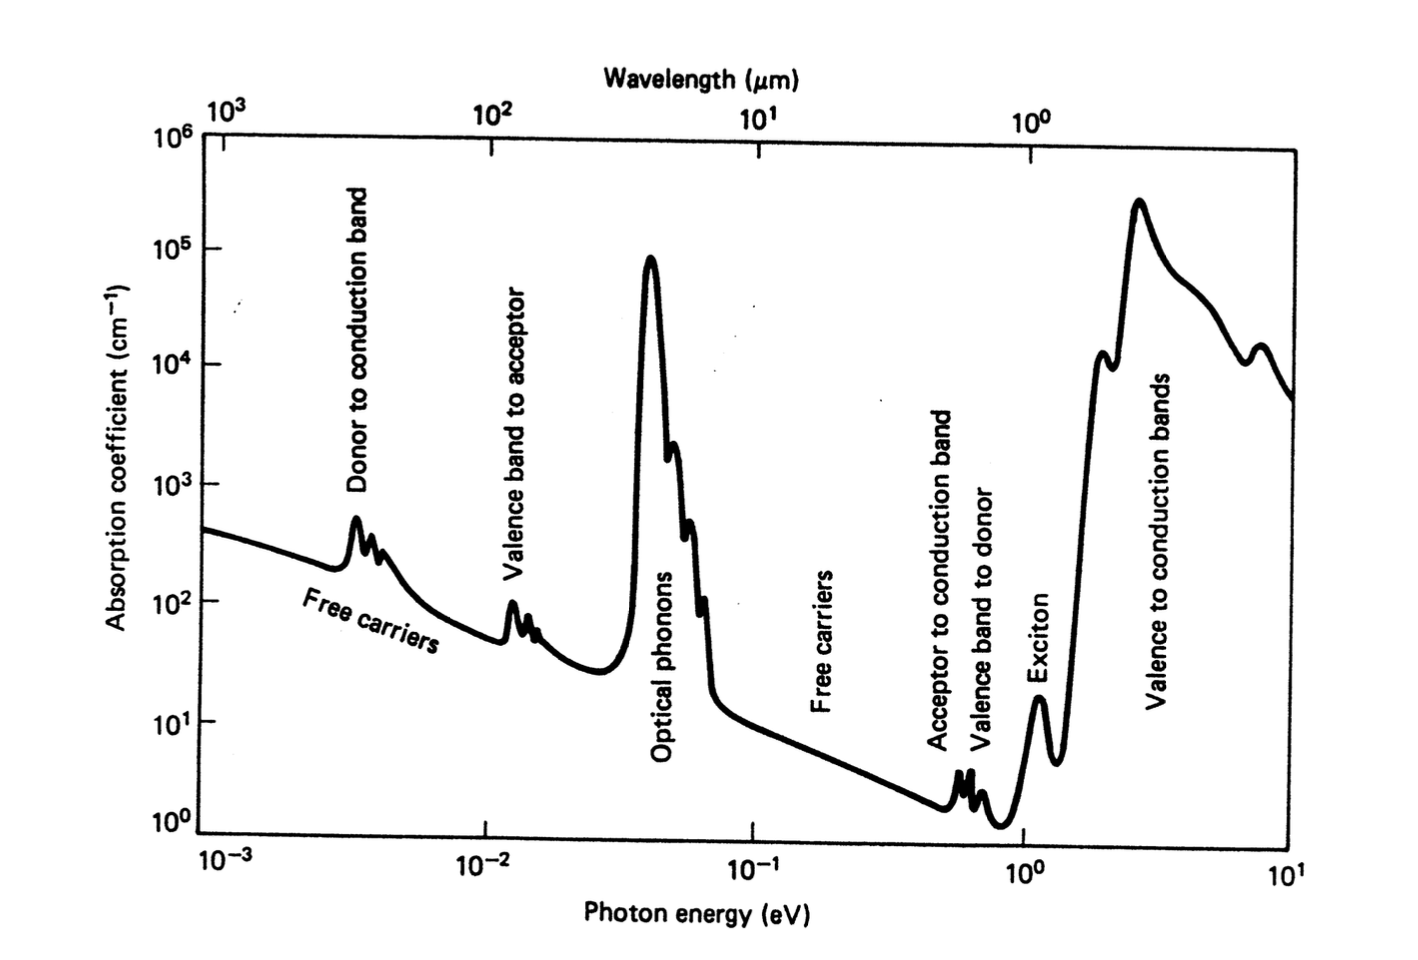

And one from one of my group's papers:

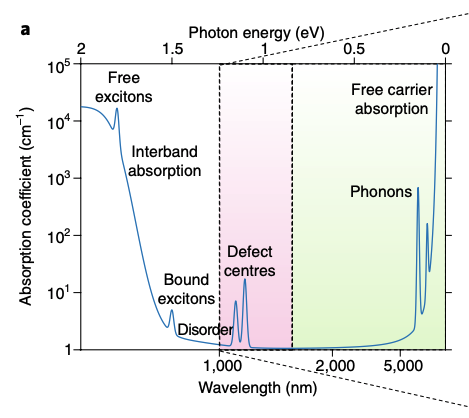

(note that the axes on this one are reversed, so it goes from high energy to low energy)